# Unit 5 - Financial Planning

In [19]:
%config Completer.use_jedi = False
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [20]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [21]:
# Set current amount of crypto assets


#Crypto assets
my_btc = 1.2
my_eth = 5.3

# YOUR CODE HERE!

In [22]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [23]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
btc_data
btc_price = btc_data['data']['1']['quotes']['CAD']['price']
print(btc_price)

# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()
eth_data
eth_price = eth_data['data']['1027']['quotes']['CAD']['price']
print(eth_price)

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

25267.899504
1771.12632
The current value of your 1.2 BTC is $30321.48
The current value of your 5.3 ETH is $9386.97


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [25]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("API_Key_Id")
alpaca_secret_key = os.getenv("Secret_Key")

# Ensuring that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [26]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2022-09-16", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df


# Display sample data
df_portfolio


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!

AGG = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])



# Preview DataFrame
# YOUR CODE HERE!
df_portfolio

AGG                                            \
                            open   high    low  close   volume trade_count   
timestamp                                                                    
2022-09-16 04:00:00+00:00  98.66  99.01  98.61  98.83  6960889       22173   

                                         SPY                          \
                                vwap    open    high     low   close   
timestamp                                                              
2022-09-16 04:00:00+00:00  98.802106  384.18  386.25  382.11  385.56   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2022-09-16 04:00:00+00:00  102473759      669360  384.602012

In [9]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

#df_closing_prices = pd.DataFrame()

# Fetch the closing prices of AGG and SPY
#df_closing_prices["AGG"] = df_portfolio["AGG"]["close"]
#df_closing_prices["SPY"] = df_portfolio["SPY"]["close"]

# Drop the time component of the date
#df_closing_prices.index = df_closing_prices.index.date

# Display sample data
#print(df_closing_prices)

#agg_close_price=()
#spy_close_price=()
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.83
Current SPY closing price: $385.56


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = spy_close_price * my_spy
my_agg_value = agg_close_price * my_agg
# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $19278.00
The current value of your 200 AGG shares is $19766.00


### Savings Health Analysis

In [11]:
# Set monthly household income
# YOUR CODE HERE!
Avg_Hou_Inc = 12000
monthly_income =Avg_Hou_Inc

# Consolidate financial assets data
# YOUR CODE HERE!
Crypto_Value = my_btc_value + my_eth_value
Shares_Value = my_spy_value + my_agg_value
 

# Create savings DataFrame
# YOUR CODE HERE!
Asset_Value = {
    "Amount": [Crypto_Value, Shares_Value]
}

# Set the tickers
tickers = ["Crypto", "Shares"]

# Create the shares DataFrame with `tickers` as index
df_savings = pd.DataFrame(Asset_Value, index=tickers)
# Display savings DataFrame
display(df_savings)

,Amount
Crypto,39696.266642
Shares,39044.000000


<AxesSubplot:title={'center':'Portfolio Composition'}, ylabel='Amount'>

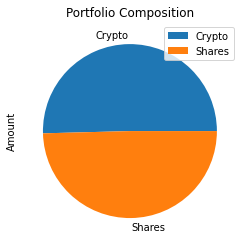

In [12]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="Amount", title="Portfolio Composition")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
Total_savings = Crypto_Value + Shares_Value

# Calculate total amount of savings
# YOUR CODE HERE!
Total_savings = Crypto_Value + Shares_Value
# Validate saving health
# YOUR CODE HERE!
if emergency_fund > Total_savings:
    print(f"congratulations Total savings exceeds emergency fund threshhold")
elif emergency_fund == Total_savings:
        print(f" Good job, Total savings meets emergency fund threshhold")
else:
        print(f"Total savings is less than emergency fund threshhold: Increase savings!!")

Total savings is less than emergency fund threshhold: Increase savings!!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2017-01-19', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2022-01-19', tz='America/New_York').isoformat()

In [28]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_stock_data.head(10)

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-01-19 05:00:00+00:00  108.06  108.1600  107.9334  108.04  2387984   
2017-01-20 05:00:00+00:00  107.94  108.1191  107.8300  108.08  3524950   
2017-01-23 05:00:00+00:00  108.22  108.5700  108.1000  108.38  3063351   
2017-01-24 05:00:00+00:00  108.33  108.3962  108.1010  108.21  2049504   
2017-01-25 05:00:00+00:00  107.98  108.0400  107.8300  107.92  2912944   

                                                      SPY                     \
                          trade_count        vwap    open     high       low   
timestamp                                                                      
2017-01-19 05:00:00+00:00        9557  108.052537  226.83  227.000  225.4100   
2017-01-20 05:00:00+00:00       13485  107.965919  226.73  227.310  225.9719   
2017-01-23 05:00:00+00:00       13199  108.389604  226.37  226.805  225.2700   
2017-01-24 05:00:00+00:00        9423  108.227757  226.40  228.080  226.2700   
2017-01-25 05:00:00+00:00       11123  107.905325  228.70  229.570  228.5100   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2017-01-19 05:00:00+00:00  225.91   66608767      221357  226.249549  
2017-01-20 05:00:00+00:00  226.74  129068623      326541  226.629359  
2017-01-23 05:00:00+00:00  226.15   75061645      237951  226.101034  
2017-01-24 05:00:00+00:00  227.60   95555295      227594  227.154866  
2017-01-25 05:00:00+00:00  229.57   84437898      246389  229.097514

In [30]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [31]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_30year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-01-19 05:00:00+00:00  108.06  108.1600  107.9334  108.04  2387984   
2017-01-20 05:00:00+00:00  107.94  108.1191  107.8300  108.08  3524950   
2017-01-23 05:00:00+00:00  108.22  108.5700  108.1000  108.38  3063351   
2017-01-24 05:00:00+00:00  108.33  108.3962  108.1010  108.21  2049504   
2017-01-25 05:00:00+00:00  107.98  108.0400  107.8300  107.92  2912944   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-01-19 05:00:00+00:00        9557  108.052537          NaN  226.83   
2017-01-20 05:00:00+00:00       13485  107.965919     0.000370  226.73   
2017-01-23 05:00:00+00:00       13199  108.389604     0.002776  226.37   
2017-01-24 05:00:00+00:00        9423  108.227757    -0.001569  226.40   
2017-01-25 05:00:00+00:00       11123  107.905325    -0.002680  228.70   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2017-01-19 05:00:00+00:00  227.000  225.4100  225.91   66608767      221357   
2017-01-20 05:00:00+00:00  227.310  225.9719  226.74  129068623      326541   
2017-01-23 05:00:00+00:00  226.805  225.2700  226.15   75061645      237951   
2017-01-24 05:00:00+00:00  228.080  226.2700  227.60   95555295      227594   
2017-01-25 05:00:00+00:00  229.570  228.5100  229.57   84437898      246389   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-01-19 05:00:00+00:00  226.249549          NaN  
2017-01-20 05:00:00+00:00  226.629359     0.003674  
2017-01-23 05:00:00+00:00  226.101034    -0.002602  
2017-01-24 05:00:00+00:00  227.154866     0.006412  
2017-01-25 05:00:00+00:00  229.097514     0.008656

In [32]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_30year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/yemifafo/Downloads/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992280,1.003007,1.007397,0.991937,1.002651,0.999919,0.997347,1.001509,0.994454,1.008757,...,1.006394,0.997017,1.003109,1.002225,1.004411,1.014930,1.005777,1.011214,0.996295,1.007764
2,0.991696,1.005921,1.009797,0.994065,1.006807,1.007865,1.004879,0.999941,0.992477,0.998422,...,1.009357,1.001570,0.998628,1.001911,1.002474,1.015312,1.002172,1.005581,0.997405,1.008156
3,0.989202,1.010327,1.005881,1.002554,1.015475,1.008194,0.999111,0.998046,0.992577,0.997846,...,1.013204,1.008461,1.003325,0.999154,0.988328,1.013815,0.993819,1.006458,0.996284,1.002056
4,0.993718,1.009717,1.019613,1.003141,1.015217,0.998101,0.990889,0.997431,0.988306,0.995330,...,1.011502,1.016126,1.011095,1.002065,0.995670,1.027000,1.000725,1.006163,0.994865,1.007981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,7.511781,10.012379,16.295471,4.343011,42.290694,13.856484,6.668348,10.143443,13.350153,5.221377,...,10.017034,4.788368,18.758509,21.655858,10.254922,9.704223,4.915019,25.032771,12.313431,22.345052
7557,7.555466,9.931616,16.290031,4.350063,42.670161,13.866900,6.680858,10.187934,13.319984,5.278117,...,9.899904,4.781039,18.899291,21.547217,10.254545,9.752497,4.925897,24.900372,12.232312,22.441018
7558,7.525429,9.912665,16.329360,4.336438,42.526543,13.930613,6.512922,10.202249,13.447010,5.227483,...,9.846236,4.798857,18.921315,21.630189,10.395815,9.657096,4.869476,24.929593,12.264336,22.304962
7559,7.535196,9.820476,16.344618,4.341484,42.497715,13.955785,6.469467,10.275961,13.565258,5.223768,...,9.888561,4.803515,18.815380,21.854356,10.324890,9.732433,4.909165,24.844761,12.211587,22.198439


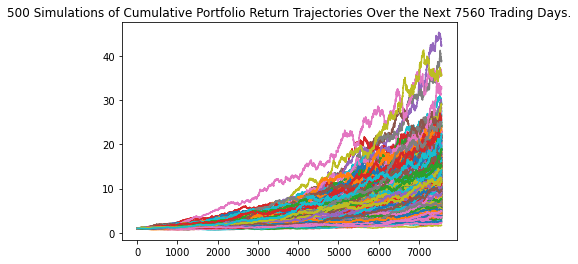

In [34]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_30year.plot_simulation()

# Save the plot for future usage
line_plot.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

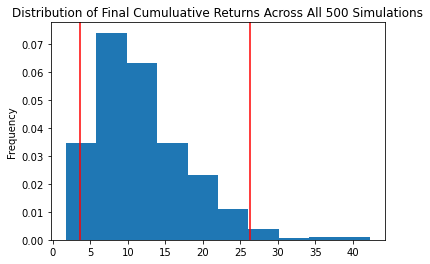

In [35]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_30year.plot_distribution()

### Retirement Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
Stat_tbl= MC_30year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(Stat_tbl)

count           500.000000
mean             11.881380
std               6.205489
min               1.716615
25%               7.336499
50%              10.423085
75%              15.162724
max              42.287206
95% CI Lower      3.571043
95% CI Upper     26.244562
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [37]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(Stat_tbl[8]*initial_investment,2)
ci_upper = round(Stat_tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $71420.87 and $524891.25


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [38]:
# Set initial investment
initial_investment_new = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(Stat_tbl[8]*initial_investment_new,2)
ci_upper = round(Stat_tbl[9]*initial_investment_new,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $107131.3 and $787336.87


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [45]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_05year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*5
)

MC_05year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-01-19 05:00:00+00:00  108.06  108.1600  107.9334  108.04  2387984   
2017-01-20 05:00:00+00:00  107.94  108.1191  107.8300  108.08  3524950   
2017-01-23 05:00:00+00:00  108.22  108.5700  108.1000  108.38  3063351   
2017-01-24 05:00:00+00:00  108.33  108.3962  108.1010  108.21  2049504   
2017-01-25 05:00:00+00:00  107.98  108.0400  107.8300  107.92  2912944   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-01-19 05:00:00+00:00        9557  108.052537          NaN  226.83   
2017-01-20 05:00:00+00:00       13485  107.965919     0.000370  226.73   
2017-01-23 05:00:00+00:00       13199  108.389604     0.002776  226.37   
2017-01-24 05:00:00+00:00        9423  108.227757    -0.001569  226.40   
2017-01-25 05:00:00+00:00       11123  107.905325    -0.002680  228.70   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2017-01-19 05:00:00+00:00  227.000  225.4100  225.91   66608767      221357   
2017-01-20 05:00:00+00:00  227.310  225.9719  226.74  129068623      326541   
2017-01-23 05:00:00+00:00  226.805  225.2700  226.15   75061645      237951   
2017-01-24 05:00:00+00:00  228.080  226.2700  227.60   95555295      227594   
2017-01-25 05:00:00+00:00  229.570  228.5100  229.57   84437898      246389   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-01-19 05:00:00+00:00  226.249549          NaN  
2017-01-20 05:00:00+00:00  226.629359     0.003674  
2017-01-23 05:00:00+00:00  226.101034    -0.002602  
2017-01-24 05:00:00+00:00  227.154866     0.006412  
2017-01-25 05:00:00+00:00  229.097514     0.008656

In [46]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_05year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/yemifafo/Downloads/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999416,1.004139,1.008725,0.998666,1.001719,1.000944,1.002818,1.008875,0.992756,0.991783,...,0.995316,0.995118,1.007651,1.002589,1.000105,1.001257,0.996157,1.012778,0.985758,0.996773
2,1.000273,1.000807,1.000896,0.992249,1.002086,1.001376,1.001945,1.008802,0.983479,0.997303,...,0.993704,0.997230,1.017229,0.994848,1.006983,0.998625,1.004435,1.001458,0.983956,0.999679
3,0.997652,1.004456,0.999394,0.985404,1.001702,0.999316,1.007236,1.017408,0.985194,0.988406,...,0.991823,1.002639,1.027169,1.008762,1.014514,0.983911,1.009498,1.011888,0.973958,1.004489
4,0.993830,0.999283,1.009217,0.987614,1.011142,0.999621,1.018859,1.027634,0.987060,0.980354,...,0.991887,1.002522,1.016696,0.995189,1.006220,0.987453,1.012947,1.011850,0.979518,1.001737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.992896,1.451148,1.213889,1.715883,1.652399,2.340935,2.413829,1.401654,0.993791,1.737319,...,1.065561,1.556679,1.488292,1.230218,1.838035,1.920077,1.236946,1.057495,1.670358,1.928129
1257,1.985675,1.450459,1.219555,1.719327,1.637392,2.339582,2.374494,1.400471,0.989216,1.728225,...,1.068096,1.572405,1.479613,1.223577,1.819035,1.923782,1.226631,1.048637,1.671847,1.932622
1258,1.981590,1.448472,1.217166,1.717178,1.633980,2.372491,2.344278,1.400030,0.985419,1.739342,...,1.069131,1.563375,1.471782,1.238915,1.819748,1.930556,1.237259,1.047235,1.686216,1.930759
1259,1.998052,1.445456,1.231776,1.721169,1.640775,2.371284,2.367483,1.387438,0.979281,1.736009,...,1.068725,1.558262,1.483840,1.235481,1.838396,1.917758,1.240375,1.048658,1.680491,1.929628


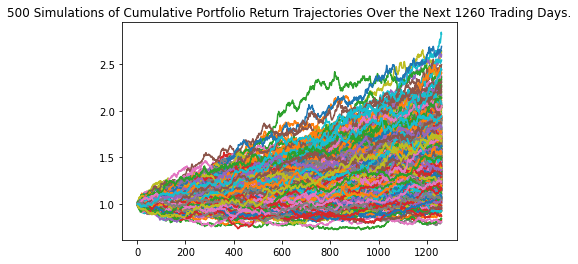

In [47]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_05yr = MC_05year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

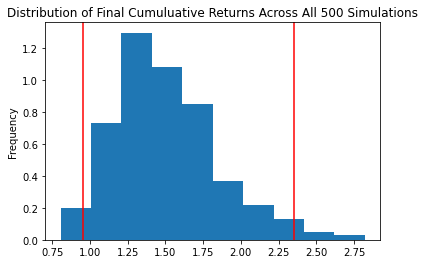

In [48]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_05year.plot_distribution()

In [52]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
Stat_tbl_Rt= MC_05year.summarize_cumulative_return()




# Print summary statistics
# YOUR CODE HERE!
print(Stat_tbl_Rt)

count           500.000000
mean              1.501022
std               0.345400
min               0.804992
25%               1.259630
50%               1.465319
75%               1.689037
max               2.822161
95% CI Lower      0.956404
95% CI Upper      2.355034
Name: 1260, dtype: float64


In [57]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_Rt =25000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(Stat_tbl_Rt[8]*initial_investment_Rt,2)
ci_upper_five = round(Stat_tbl_Rt[9]*initial_investment_Rt,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_Rt} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $25000 in the portfolio over the next 5 years will end within in the range of $23910.11 and $58875.85


### Ten Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.50,.50],
    num_simulation = 500,
    num_trading_days = 252*10
)

MC_05year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2017-01-19 05:00:00+00:00  108.06  108.1600  107.9334  108.04  2387984   
2017-01-20 05:00:00+00:00  107.94  108.1191  107.8300  108.08  3524950   
2017-01-23 05:00:00+00:00  108.22  108.5700  108.1000  108.38  3063351   
2017-01-24 05:00:00+00:00  108.33  108.3962  108.1010  108.21  2049504   
2017-01-25 05:00:00+00:00  107.98  108.0400  107.8300  107.92  2912944   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2017-01-19 05:00:00+00:00        9557  108.052537          NaN  226.83   
2017-01-20 05:00:00+00:00       13485  107.965919     0.000370  226.73   
2017-01-23 05:00:00+00:00       13199  108.389604     0.002776  226.37   
2017-01-24 05:00:00+00:00        9423  108.227757    -0.001569  226.40   
2017-01-25 05:00:00+00:00       11123  107.905325    -0.002680  228.70   

                                                                             \
                              high       low   close     volume trade_count   
timestamp                                                                     
2017-01-19 05:00:00+00:00  227.000  225.4100  225.91   66608767      221357   
2017-01-20 05:00:00+00:00  227.310  225.9719  226.74  129068623      326541   
2017-01-23 05:00:00+00:00  226.805  225.2700  226.15   75061645      237951   
2017-01-24 05:00:00+00:00  228.080  226.2700  227.60   95555295      227594   
2017-01-25 05:00:00+00:00  229.570  228.5100  229.57   84437898      246389   

                                                    
                                 vwap daily_return  
timestamp                                           
2017-01-19 05:00:00+00:00  226.249549          NaN  
2017-01-20 05:00:00+00:00  226.629359     0.003674  
2017-01-23 05:00:00+00:00  226.101034    -0.002602  
2017-01-24 05:00:00+00:00  227.154866     0.006412  
2017-01-25 05:00:00+00:00  229.097514     0.008656

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_10year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/yemifafo/Downloads/UTOR-VIRT-FIN-PT-08-2022-U-LOLC/Homework/05-APIs/Instructions/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.996037,1.007912,1.004614,1.010778,1.004708,0.997391,0.999571,0.991518,0.989283,1.000652,...,1.003612,0.996644,0.999748,1.008141,1.006720,1.002595,1.003819,1.006334,0.996556,0.996870
2,0.997345,1.003331,0.999756,1.006410,0.990732,0.996729,1.000875,0.991604,0.985678,0.996146,...,1.004840,0.989360,1.003634,1.010621,0.993881,0.993453,1.003267,1.007301,0.989021,0.994601
3,1.001763,1.002515,1.006076,1.012037,1.001582,0.997529,1.004902,0.992165,0.984845,0.990613,...,1.001565,0.990466,0.996814,1.008450,0.995826,0.979081,1.014489,1.004633,0.991393,0.996079
4,1.013226,1.004139,1.018814,1.011215,0.996252,0.995986,1.001442,0.989819,0.993239,0.991287,...,1.007362,1.001348,0.995130,1.014210,0.985109,0.980859,0.998102,1.000362,1.002408,0.999778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.805008,1.958836,2.100258,2.123213,1.653207,2.631862,2.946474,1.383898,1.732117,1.923316,...,2.723309,2.819738,3.035934,1.645294,2.106218,2.923924,1.951125,1.347702,1.314420,1.461332
2517,2.820575,1.952838,2.094450,2.124782,1.642247,2.628460,2.936613,1.381730,1.713282,1.938944,...,2.718905,2.841096,3.020781,1.647328,2.130294,2.928838,1.958464,1.345738,1.310460,1.454514
2518,2.806186,1.955172,2.107594,2.120336,1.628438,2.659123,2.963117,1.390365,1.703718,1.955280,...,2.722772,2.836847,3.028059,1.639973,2.147454,2.943328,1.956854,1.353944,1.310732,1.449452
2519,2.819797,1.951079,2.100081,2.135107,1.624658,2.656815,2.940187,1.389381,1.699069,1.935749,...,2.732946,2.862504,3.028737,1.647024,2.127143,2.944327,1.960625,1.367937,1.304855,1.448419


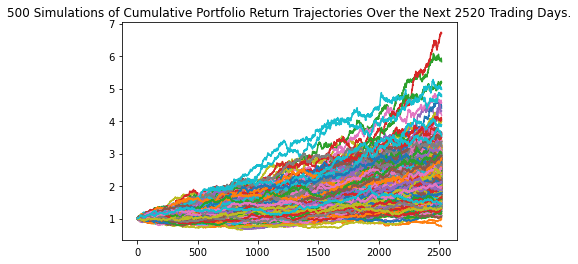

In [60]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_10yr = MC_10year.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

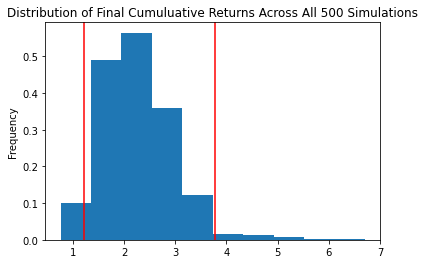

In [61]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
MC_10year.plot_distribution()

In [62]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
Stat_tbl_10yr= MC_10year.summarize_cumulative_return()




# Print summary statistics
# YOUR CODE HERE!
print(Stat_tbl_10yr)

count           500.000000
mean              2.270410
std               0.716531
min               0.756126
25%               1.750095
50%               2.181000
75%               2.678631
max               6.706163
95% CI Lower      1.218770
95% CI Upper      3.774912
Name: 2520, dtype: float64


In [63]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_10 =100000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(Stat_tbl_10yr[8]*initial_investment_10,2)
ci_upper_ten = round(Stat_tbl_10yr[9]*initial_investment_10,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment_10} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $100000 in the portfolio over the next 10 years will end within in the range of $121877.03 and $377491.24
